In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
from puzzle import *
from global_values import *
from displaying import *

In [2]:
image_path = "testing_images/sleepy.jpg" 
output_folder = "fragments"

fragments = divide_image(image_path, output_folder, COL_NR, ROW_NR)

-------------------------All Posible Matches-------------
score: 0.00048806675196627126
is correct: True
color score: 0.005874470147557401 grad score: 0.0
grad presence: 12.03620126924076 grad match: 0.0
max: 0.027169424432452977 min: 0.0
[0.         0.         0.         0.00679236 0.         0.01358471
 0.02716942 0.01358471 0.00679236 0.02037707 0.02037707 0.00679236
 0.         0.00679236 0.         0.         0.         0.
 0.         0.         0.00679236 0.         0.00679236 0.00679236
 0.01358471 0.         0.01358471 0.02037707 0.01358471 0.01358471
 0.         0.         0.         0.         0.         0.
 0.        ]


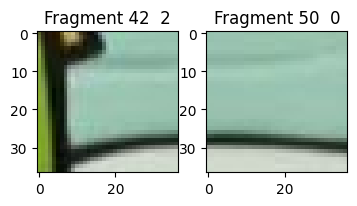

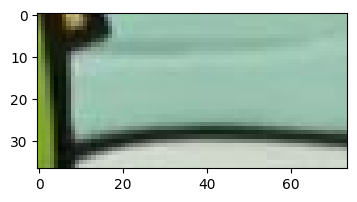

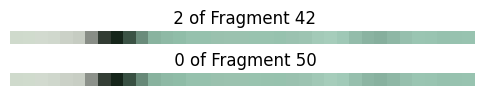

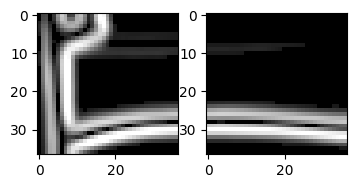

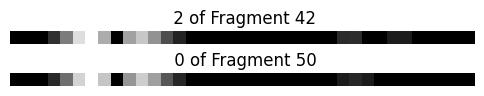

-----------------------------------------------------------------------------------
score: 0.0005547541719333802
is correct: True
color score: 0.0064252017238909075 grad score: 0.0
grad presence: 11.582069129366243 grad match: 0.0
max: 0.03396178054056622 min: 0.0
[0.         0.         0.00679236 0.00679236 0.02037707 0.03396178
 0.01358471 0.01358471 0.03396178 0.01358471 0.00679236 0.00679236
 0.01358471 0.00679236 0.         0.00679236 0.         0.
 0.00679236 0.         0.         0.         0.         0.
 0.00679236 0.00679236 0.00679236 0.00679236 0.         0.
 0.         0.00679236 0.00679236 0.00679236 0.         0.
 0.        ]


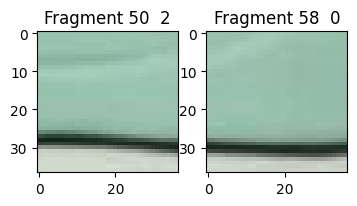

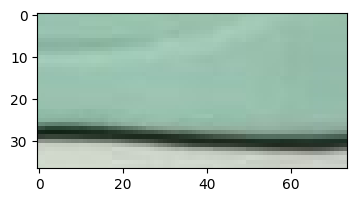

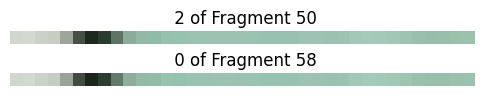

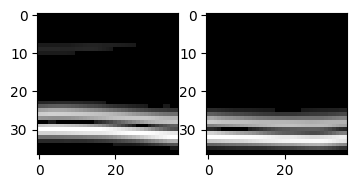

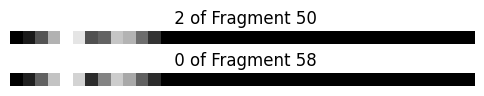

-----------------------------------------------------------------------------------
score: 0.001033204205214573
is correct: True
color score: 0.009090120498068672 grad score: 0.0
grad presence: 8.79798922515676 grad match: 0.0
max: 0.06792356108113244 min: 0.0
[0.         0.         0.         0.         0.         0.
 0.00679236 0.00679236 0.00679236 0.00679236 0.         0.
 0.         0.00679236 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00679236 0.00679236 0.03396178 0.06792356
 0.0611312  0.03396178 0.         0.00679236 0.00679236 0.01709372
 0.0611312 ]


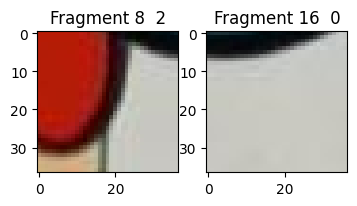

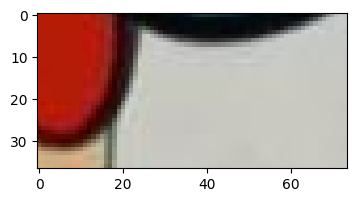

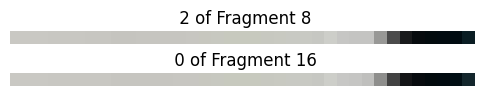

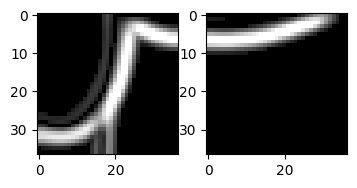

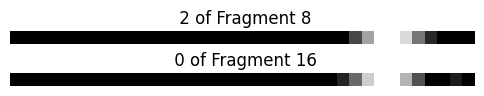

-----------------------------------------------------------------------------------
score: 0.0010582850917420857
is correct: True
color score: 0.007616680628139718 grad score: 0.0
grad presence: 7.197190652394529 grad match: 0.0
max: 0.054338848864905955 min: 0.0
[0.         0.01358471 0.03396178 0.04075414 0.05433885 0.01839379
 0.046068   0.02716942 0.00679236 0.01358471 0.         0.
 0.00679236 0.         0.         0.00679236 0.         0.00679236
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00679236]


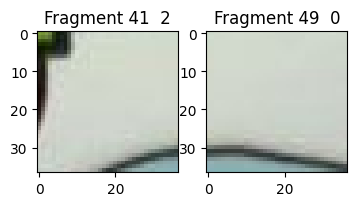

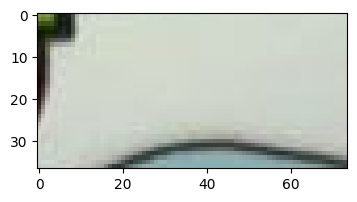

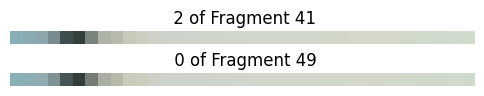

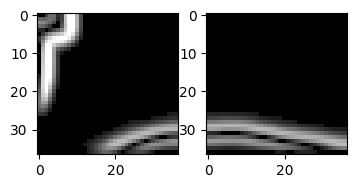

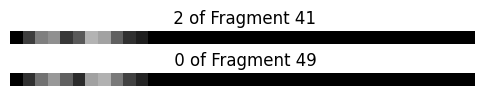

-----------------------------------------------------------------------------------
score: 0.0010741846069221815
is correct: True
color score: 0.01697627783895868 grad score: 0.0
grad presence: 15.803872682010894 grad match: 0.0
max: 0.07950248993220899 min: 0.0
[0.         0.00960584 0.00679236 0.01300637 0.01300637 0.01300637
 0.00679236 0.00679236 0.01413942 0.01176471 0.00960584 0.
 0.02716942 0.06395885 0.07950249 0.04850713 0.00679236 0.
 0.         0.00679236 0.00679236 0.02716942 0.05433885 0.06792356
 0.0611312  0.02037707 0.00679236 0.00679236 0.01358471 0.00679236
 0.00679236 0.01240109 0.         0.         0.         0.
 0.        ]


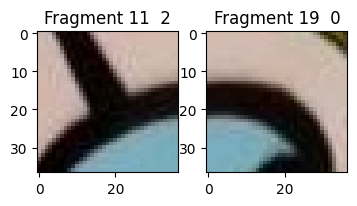

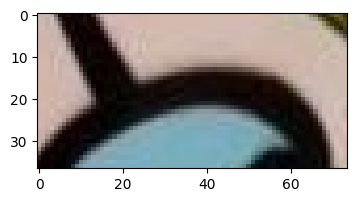

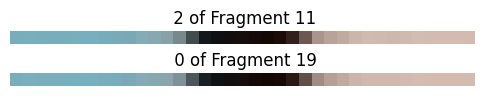

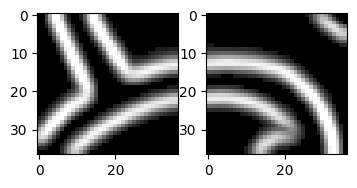

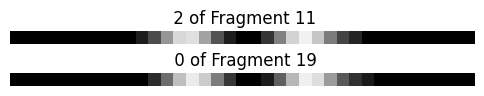

-----------------------------------------------------------------------------------
score: 0.0014070514312891139
is correct: True
color score: 0.017843255255248974 grad score: 0.0
grad presence: 12.68130890698849 grad match: 0.0
max: 0.08847462096218414 min: 0.0
[0.00679236 0.01358471 0.01358471 0.00679236 0.00679236 0.
 0.00554594 0.00392157 0.         0.         0.00876889 0.00392157
 0.00554594 0.04384447 0.01797089 0.01839379 0.046068   0.01467317
 0.08847462 0.0681496  0.02037707 0.05433885 0.08645258 0.02417417
 0.02881753 0.00679236 0.01300637 0.00876889 0.02111829 0.00784314
 0.         0.         0.         0.         0.00784314 0.00784314
 0.        ]


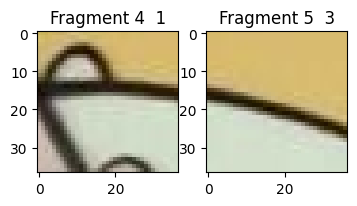

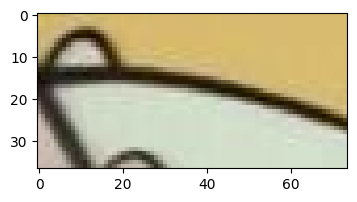

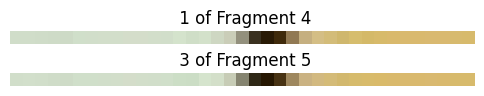

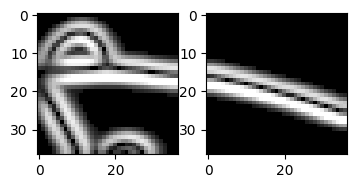

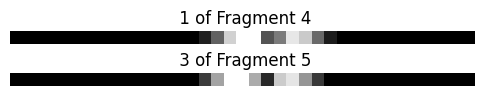

-----------------------------------------------------------------------------------
score: 0.0015180164446391244
is correct: True
color score: 0.007698630032864119 grad score: 0.0
grad presence: 5.071505346358653 grad match: 0.0
max: 0.06792356108113244 min: 0.0
[0.04754649 0.06792356 0.04754649 0.04754649 0.01797089 0.
 0.01358471 0.01358471 0.         0.00876889 0.00679236 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00679236
 0.00679236]


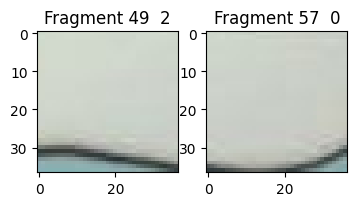

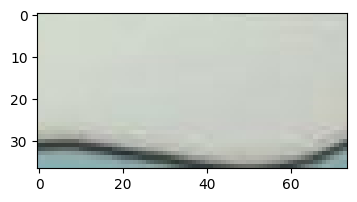

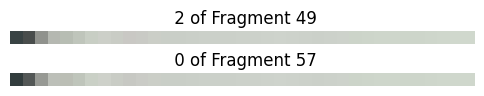

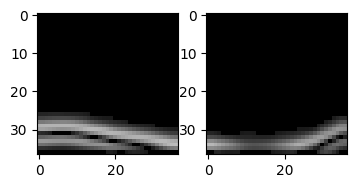

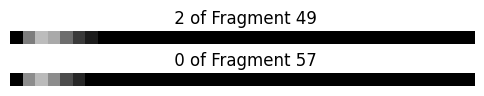

-----------------------------------------------------------------------------------
score: 0.001854989332592821
is correct: True
color score: 0.014435511876311202 grad score: 0.0
grad presence: 7.781990854440419 grad match: 0.0
max: 0.11790820688919927 min: 0.0
[0.00554594 0.02934633 0.00554594 0.00554594 0.00392157 0.00960584
 0.         0.00876889 0.00876889 0.04738449 0.11560316 0.11790821
 0.06443795 0.00554594 0.01109187 0.00679236 0.00679236 0.
 0.         0.         0.00679236 0.00679236 0.00679236 0.00679236
 0.00679236 0.01358471 0.00679236 0.00679236 0.00679236 0.00679236
 0.         0.         0.00679236 0.         0.         0.
 0.        ]


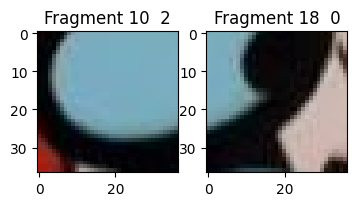

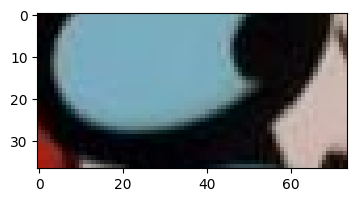

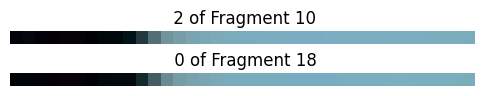

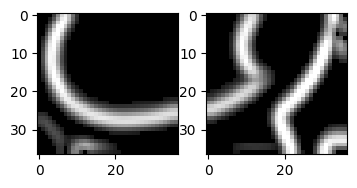

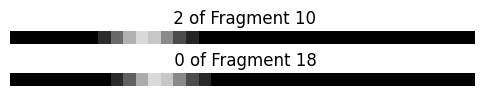

-----------------------------------------------------------------------------------
score: 0.0019054619018938062
is correct: True
color score: 0.011093338416755732 grad score: 0.0
grad presence: 5.8218621428580395 grad match: 0.0
max: 0.08847462096218414 min: 0.0
[0.08847462 0.0434923  0.08150827 0.02716942 0.02037707 0.02037707
 0.02037707 0.02716942 0.00679236 0.02037707 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00679236 0.         0.         0.         0.00679236 0.00679236
 0.         0.02037707 0.00679236 0.         0.         0.
 0.         0.00679236 0.         0.         0.         0.
 0.        ]


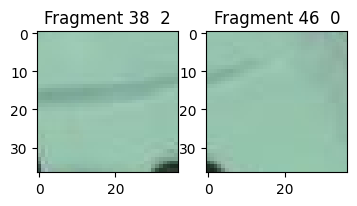

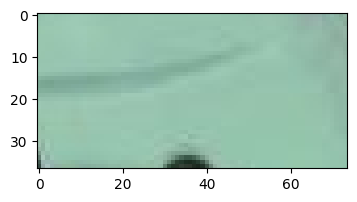

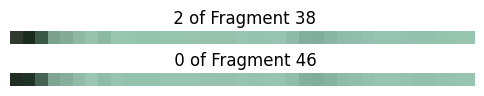

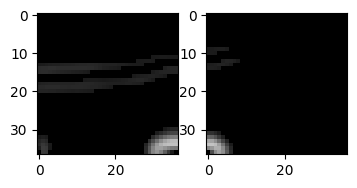

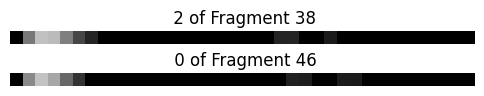

-----------------------------------------------------------------------------------
score: 0.002275099546236974
is correct: True
color score: 0.030660113450563513 grad score: 0.0
grad presence: 13.476382264756698 grad match: 0.0
max: 0.0860067145076914 min: 0.0
[0.06882325 0.0335059  0.0662037  0.08600671 0.05462113 0.04754649
 0.01839379 0.0225277  0.01999615 0.01109187 0.01616904 0.01300637
 0.01709372 0.01240109 0.02541467 0.0418709  0.0615074  0.05504184
 0.02111829 0.04331514 0.01797089 0.05433885 0.06395885 0.02630668
 0.00784314 0.01240109 0.00679236 0.00876889 0.         0.02286648
 0.01358471 0.01999615 0.02772968 0.02111829 0.02716942 0.02037707
 0.04754649]


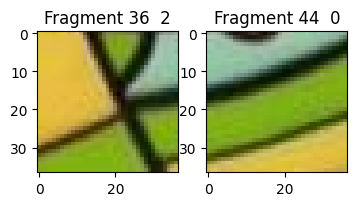

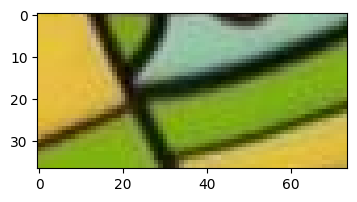

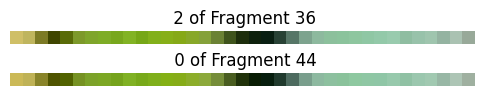

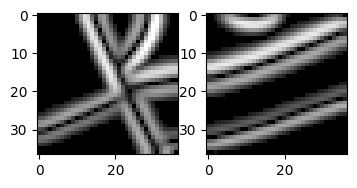

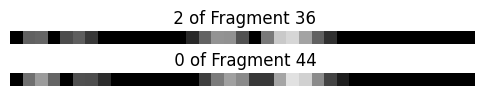

-----------------------------------------------------------------------------------
score: 0.0023185408832321645
is correct: True
color score: 0.03077881542243483 grad score: 0.0
grad presence: 13.275078876757483 grad match: 0.0
max: 0.1498429268591592 min: 0.0
[0.00679236 0.00679236 0.00679236 0.         0.         0.00679236
 0.00679236 0.00679236 0.00679236 0.01358471 0.         0.0681496
 0.10248733 0.065971   0.00784314 0.02218374 0.03615508 0.08546861
 0.05921439 0.02111829 0.01240109 0.01300637 0.01797089 0.00679236
 0.00679236 0.01467317 0.01109187 0.01663781 0.00679236 0.01358471
 0.01568627 0.01663781 0.03720327 0.12707335 0.05391266 0.08899455
 0.14984293]


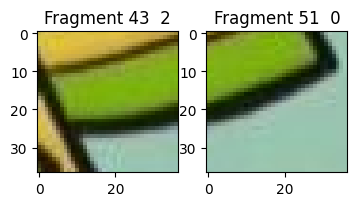

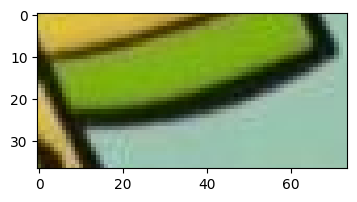

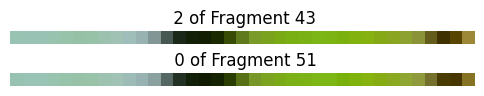

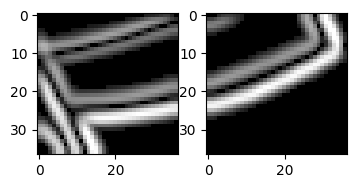

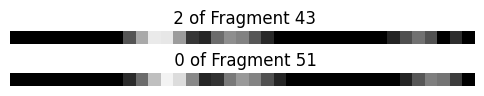

-----------------------------------------------------------------------------------
score: 0.002780147357446333
is correct: True
color score: 0.03198066544026072 grad score: 0.0
grad presence: 11.503225746094543 grad match: 0.0
max: 0.14041187286249535 min: 0.006792356108113244
[0.00679236 0.00679236 0.00679236 0.01358471 0.00679236 0.00679236
 0.00679236 0.00679236 0.01358471 0.02037707 0.02716942 0.02716942
 0.02716942 0.02037707 0.03901912 0.01921168 0.01109187 0.01709372
 0.01709372 0.02352941 0.01999615 0.01999615 0.01413942 0.01999615
 0.02286648 0.02960719 0.06573747 0.14041187 0.120041   0.07471592
 0.09321462 0.0589541  0.01663781 0.02772968 0.04471276 0.04168685
 0.04882314]


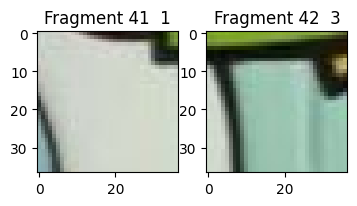

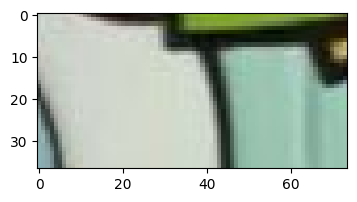

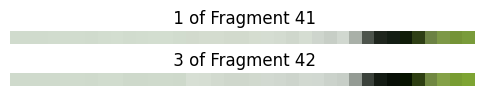

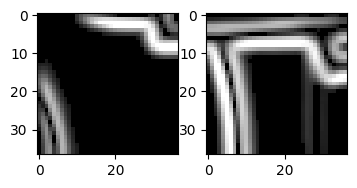

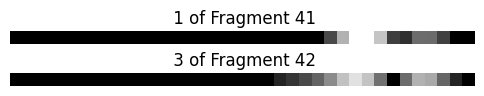

-----------------------------------------------------------------------------------
score: 0.003065893642638547
is correct: True
color score: 0.022296359901091703 grad score: 0.0
grad presence: 7.272384314026475 grad match: 0.0
max: 0.07378387342049716 min: 0.0
[0.03396178 0.03396178 0.02037707 0.         0.01358471 0.02037707
 0.01797089 0.01240109 0.04738449 0.07378387 0.06049901 0.03396178
 0.02827883 0.03802102 0.06431851 0.03999231 0.01921168 0.02854945
 0.02111829 0.01616904 0.02111829 0.01709372 0.01467317 0.00679236
 0.00876889 0.00554594 0.00679236 0.         0.00679236 0.
 0.00554594 0.04075414 0.02037707 0.00960584 0.01797089 0.00960584
 0.00960584]


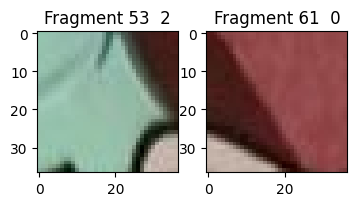

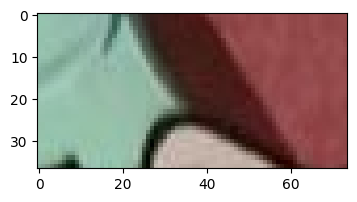

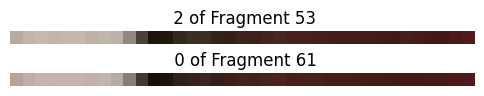

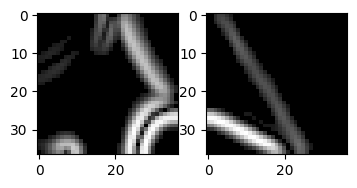

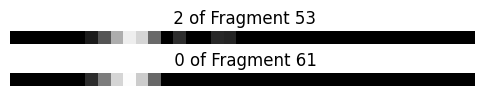

-----------------------------------------------------------------------------------
score: 0.003095817869021329
is correct: True
color score: 0.020321429117779108 grad score: 0.0
grad presence: 6.564154249935054 grad match: 0.0
max: 0.16775882067613676 min: 0.0
[0.08830063 0.07273426 0.03720327 0.00679236 0.         0.00679236
 0.         0.         0.00960584 0.00960584 0.00960584 0.00876889
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00960584 0.00679236 0.00679236
 0.01467317 0.01300637 0.01797089 0.07744478 0.16775882 0.13147494
 0.05696407]


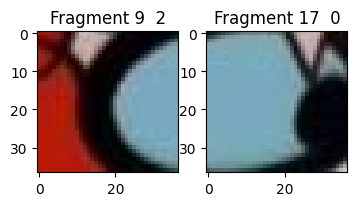

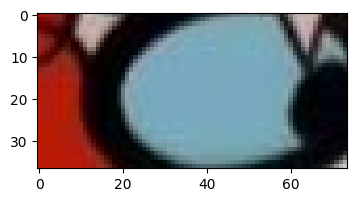

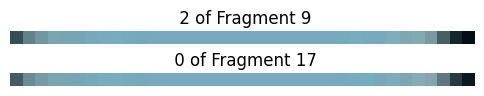

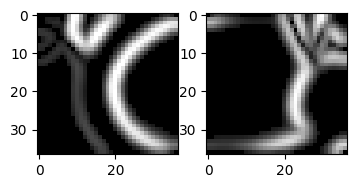

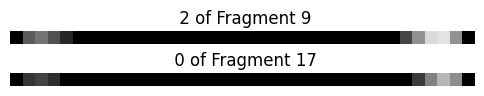

-----------------------------------------------------------------------------------
score: 0.0038552167867688053
is correct: True
color score: 0.02625399155320949 grad score: 0.0012970170427361002
grad presence: 7.231531347196352 grad match: 0.009379420699411061
max: 0.21386036399115266 min: 0.0
[0.         0.         0.         0.         0.00876889 0.00392157
 0.00392157 0.         0.00876889 0.00554594 0.00784314 0.00784314
 0.         0.00679236 0.         0.         0.01300637 0.00679236
 0.00554594 0.00554594 0.01300637 0.06249952 0.03740938 0.05843006
 0.04770794 0.02854945 0.05261336 0.04834835 0.15661746 0.21386036
 0.06286753 0.036996   0.01616904 0.00960584 0.00554594 0.01176471
 0.02511029]


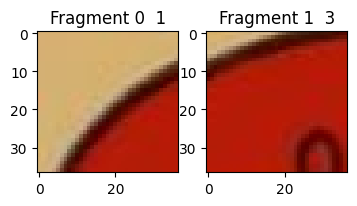

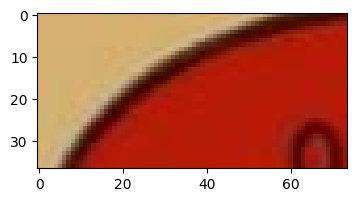

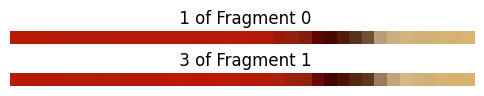

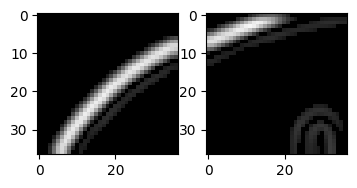

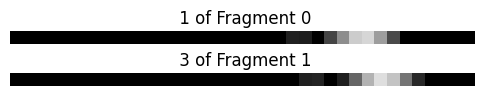

-----------------------------------------------------------------------------------
score: 0.004011418578789397
is correct: True
color score: 0.01871487048097691 grad score: 0.0
grad presence: 4.6653985621231975 grad match: 0.0
max: 0.1722814324430494 min: 0.0
[0.00876889 0.00392157 0.01358471 0.01358471 0.00876889 0.
 0.00679236 0.00679236 0.00679236 0.01176471 0.00960584 0.01616904
 0.06371795 0.         0.03720327 0.17228143 0.13584712 0.01413942
 0.01616904 0.02716942 0.01797089 0.00679236 0.         0.
 0.00679236 0.00679236 0.00784314 0.00679236 0.00679236 0.00784314
 0.01300637 0.00679236 0.00679236 0.         0.00876889 0.00960584
 0.00679236]


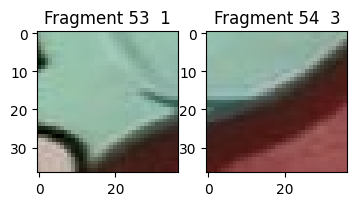

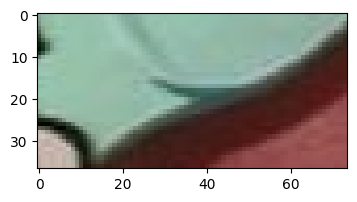

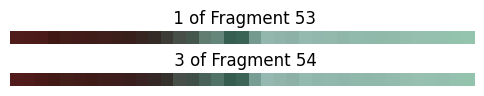

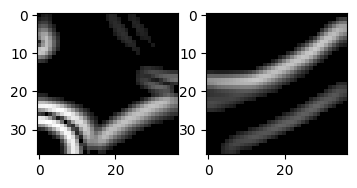

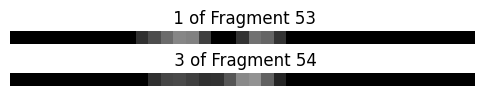

-----------------------------------------------------------------------------------
score: 0.004096435713367405
is correct: True
color score: 0.03424399356248361 grad score: 0.0011225055028399262
grad presence: 8.692161118555939 grad match: 0.009756999809655791
max: 0.1327553794494961 min: 0.005545935538718019
[0.07047922 0.04384447 0.1066061  0.12481436 0.07930882 0.02601274
 0.07823505 0.13275538 0.09387223 0.04471276 0.04241825 0.02659737
 0.02541467 0.01616904 0.03209942 0.00784314 0.00679236 0.00554594
 0.00554594 0.00960584 0.00784314 0.01240109 0.01616904 0.01358471
 0.01176471 0.01999615 0.01960784 0.01663781 0.01300637 0.01240109
 0.01663781 0.01300637 0.00679236 0.01921168 0.03012214 0.032575
 0.02659737]


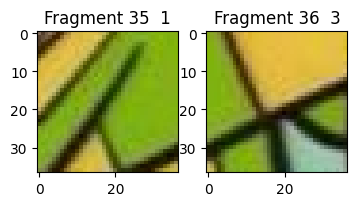

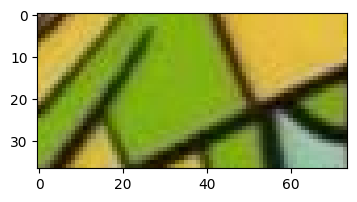

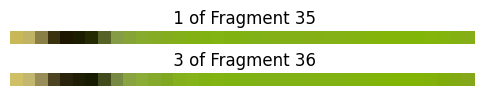

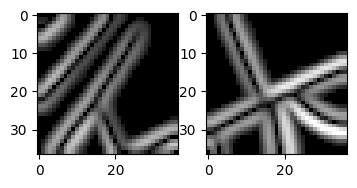

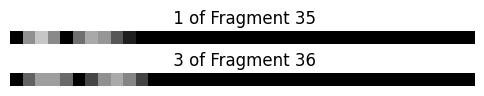

-----------------------------------------------------------------------------------
score: 0.004192572087416999
is correct: True
color score: 0.027726116600177216 grad score: 0.001600711506218668
grad presence: 7.1551834321945265 grad match: 0.011453386049730466
max: 0.21350051119711683 min: 0.0
[0.01616904 0.01999615 0.02147932 0.03012214 0.13837081 0.21350051
 0.15157763 0.04738449 0.03062843 0.05232025 0.08075004 0.06526791
 0.04539544 0.0335059  0.02881753 0.036996   0.         0.
 0.00679236 0.         0.         0.         0.00679236 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


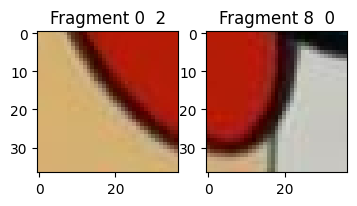

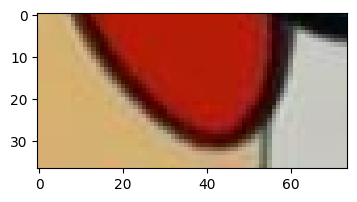

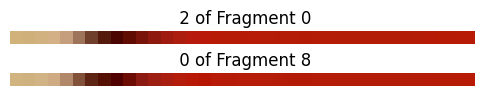

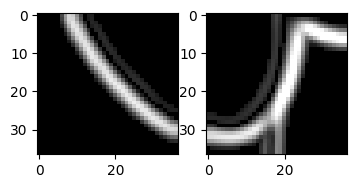

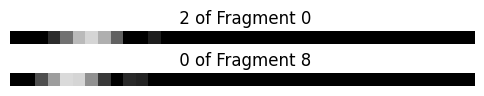

-----------------------------------------------------------------------------------
score: 0.005016543937504133
is correct: True
color score: 0.024186378373076297 grad score: 0.0
grad presence: 4.821321941528879 grad match: 0.0
max: 0.1430163335592978 min: 0.0
[0.04960436 0.05261336 0.03233808 0.08046386 0.12725475 0.02827883
 0.14301633 0.10725329 0.02111829 0.02417417 0.00960584 0.02934633
 0.00679236 0.00679236 0.         0.00554594 0.         0.00679236
 0.         0.00679236 0.00554594 0.         0.         0.
 0.         0.         0.         0.00876889 0.01999615 0.02147932
 0.00960584 0.01109187 0.01616904 0.01616904 0.01921168 0.00554594
 0.02352941]


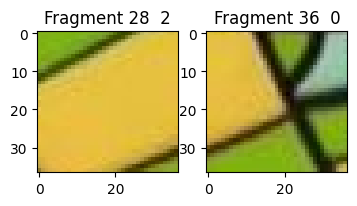

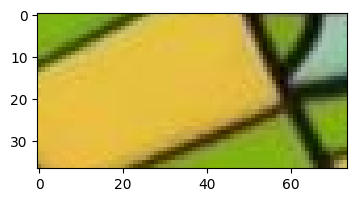

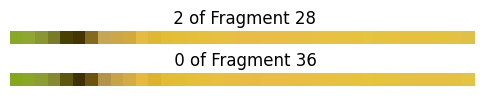

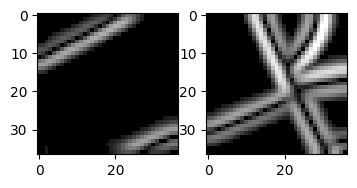

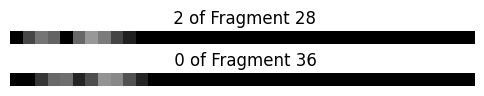

-----------------------------------------------------------------------------------
score: 0.0051504815716967
is correct: True
color score: 0.05718956355417324 grad score: 0.0007825502776728611
grad presence: 11.234157401640545 grad match: 0.008791293776624713
max: 0.29307002967111184 min: 0.0
[0.02630668 0.02659737 0.02320031 0.01709372 0.01616904 0.01109187
 0.01240109 0.01176471 0.01663781 0.01663781 0.01467317 0.01999615
 0.02571545 0.04656605 0.05290485 0.09036642 0.10617244 0.08419965
 0.04241825 0.02037707 0.03529412 0.16479923 0.29307003 0.2880952
 0.19279606 0.09557692 0.01413942 0.04075414 0.065971   0.07294539
 0.08225952 0.02352941 0.         0.02716942 0.02037707 0.01240109
 0.00554594]


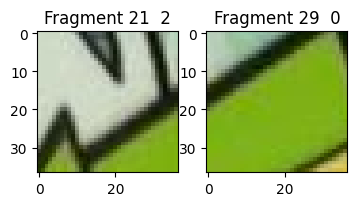

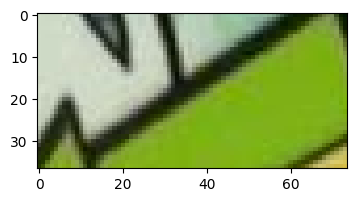

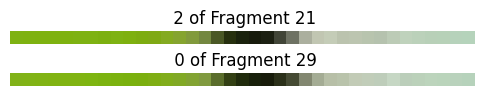

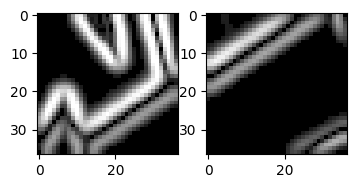

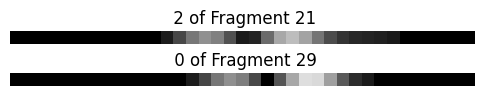

-----------------------------------------------------------------------------------
score: 0.005303332794796031
is correct: True
color score: 0.0009178859605558438 grad score: 0.0
grad presence: 0.17307619429874965 grad match: 0.0
max: 0.006792356108113244 min: 0.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00679236 0.         0.00679236
 0.00679236 0.         0.00679236 0.         0.00679236 0.
 0.        ]


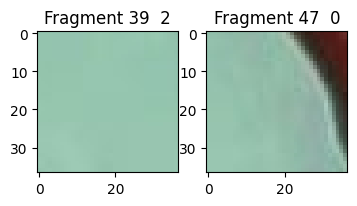

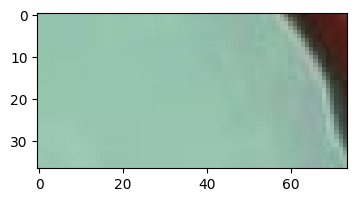

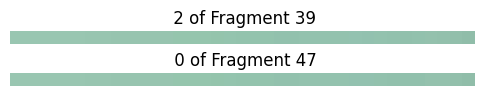

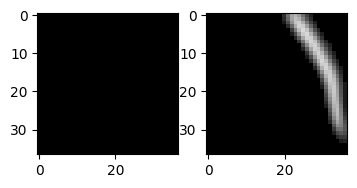

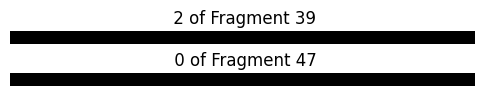

-----------------------------------------------------------------------------------
score: 0.006363999353755239
is correct: True
color score: 0.0011014631526670127 grad score: 0.0
grad presence: 0.17307619429874965 grad match: 0.0
max: 0.013584712216226489 min: 0.0
[0.00679236 0.01358471 0.00679236 0.00679236 0.00679236 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


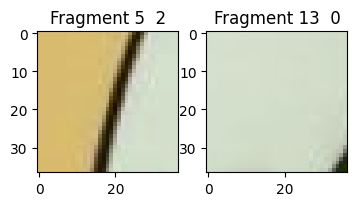

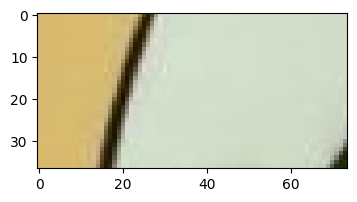

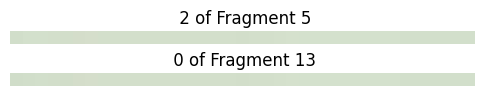

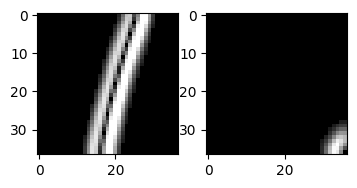

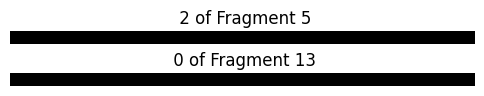

-----------------------------------------------------------------------------------
score: 0.006453344081686771
is correct: True
color score: 0.0011169266875027874 grad score: 0.0
grad presence: 0.17307619429874965 grad match: 0.0
max: 0.014673166222642907 min: 0.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00679236 0.01109187 0.00876889
 0.01467317]


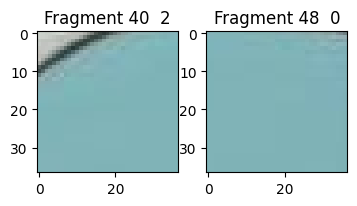

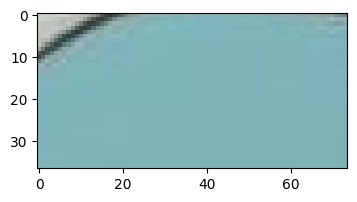

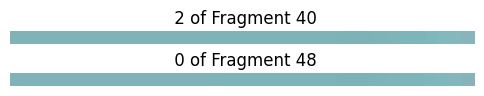

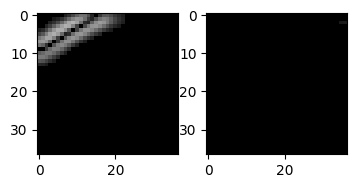

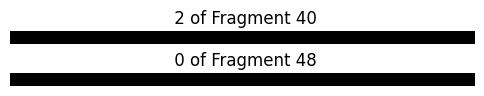

-----------------------------------------------------------------------------------
score: 0.00703358542081381
is correct: True
color score: 0.03620049390944587 grad score: 0.0
grad presence: 5.146804184496835 grad match: 0.0
max: 0.18372873372741141 min: 0.0
[0.01358471 0.00679236 0.00679236 0.01358471 0.00679236 0.
 0.01358471 0.02037707 0.00679236 0.         0.         0.02037707
 0.01358471 0.02716942 0.00679236 0.02716942 0.08150827 0.1086777
 0.09509299 0.03062843 0.01921168 0.01300637 0.00554594 0.00392157
 0.00876889 0.00554594 0.00554594 0.01797089 0.01797089 0.02417417
 0.05518136 0.0328102  0.10478737 0.18372873 0.14720254 0.16757538
 0.02716942]


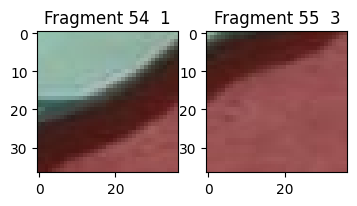

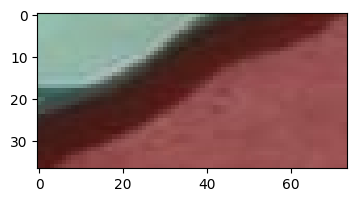

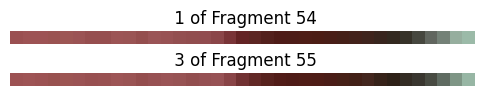

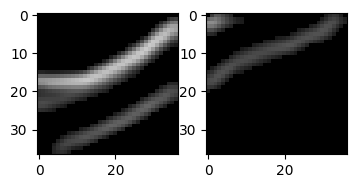

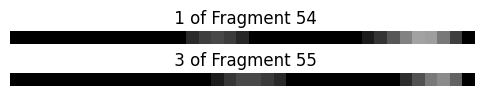

-----------------------------------------------------------------------------------
score: 0.007083535879994722
is correct: True
color score: 0.032609447329618214 grad score: 0.0021380807221145185
grad presence: 11.548879395744027 grad match: 0.024692438536146593
max: 0.25810953210830323 min: 0.0
[0.         0.         0.         0.         0.00392157 0.01467317
 0.01358471 0.12905477 0.25810953 0.19697833 0.05882353 0.22421635
 0.16549763 0.01358471 0.01797089 0.00876889 0.03062843 0.01358471
 0.00960584 0.00679236 0.01358471 0.01358471 0.         0.
 0.         0.         0.         0.         0.01358471 0.
 0.         0.         0.         0.         0.         0.
 0.        ]


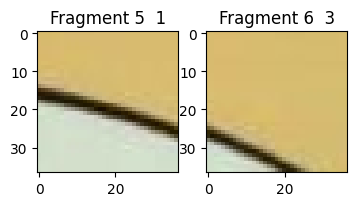

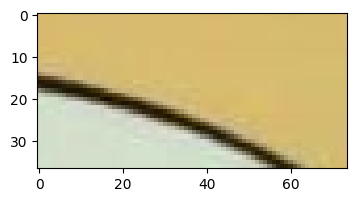

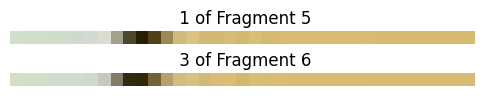

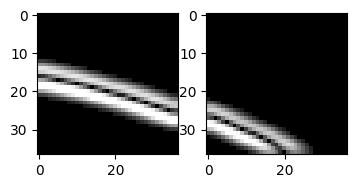

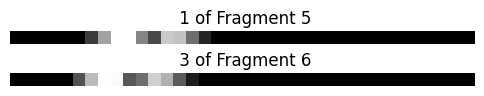

-----------------------------------------------------------------------------------
score: 0.007282982467845127
is correct: True
color score: 0.047697791125323 grad score: 0.0
grad presence: 6.54921030675682 grad match: 0.0
max: 0.22507207611422342 min: 0.0
[0.01616904 0.01616904 0.01616904 0.00784314 0.00784314 0.01616904
 0.01616904 0.03901912 0.01921168 0.00679236 0.01358471 0.00679236
 0.00679236 0.         0.00784314 0.06585434 0.05391266 0.0418709
 0.05462113 0.04075414 0.04168685 0.03463436 0.02630668 0.03062843
 0.09998077 0.19552864 0.04786885 0.1116098  0.046068   0.04018412
 0.06746922 0.08474581 0.06479495 0.04834835 0.03636713 0.22507208
 0.10994389]


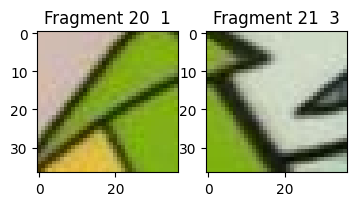

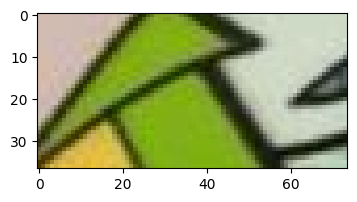

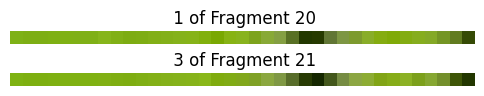

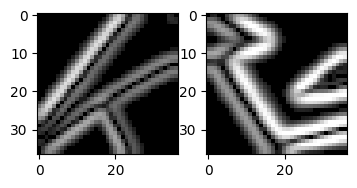

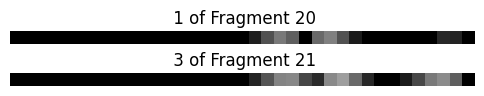

-----------------------------------------------------------------------------------
score: 0.007424665912714444
is correct: True
color score: 0.0012850403447781814 grad score: 0.0
grad presence: 0.17307619429874965 grad match: 0.0
max: 0.006792356108113244 min: 0.0
[0.00679236 0.         0.00679236 0.00679236 0.         0.00679236
 0.00679236 0.         0.00679236 0.00679236 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


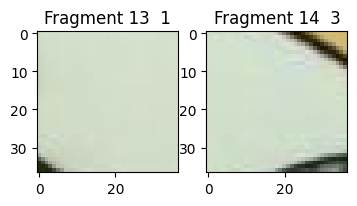

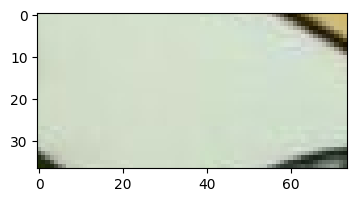

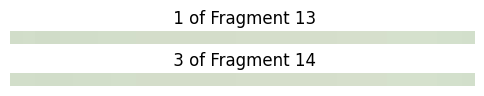

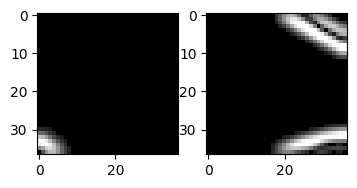

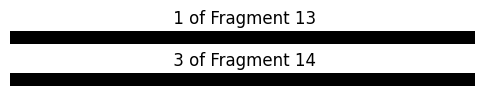

-----------------------------------------------------------------------------------
score: 0.007771973818474902
is correct: True
color score: 0.049837159010118606 grad score: 0.0027583214608746564
grad presence: 18.206993041814034 grad match: 0.050220742403552655
max: 0.2720901766070848 min: 0.0
[0.0611312  0.04075414 0.08830063 0.03396178 0.08830063 0.12226241
 0.02037707 0.01358471 0.         0.02037707 0.         0.00554594
 0.00554594 0.00554594 0.00554594 0.         0.00784314 0.
 0.00554594 0.01358471 0.00679236 0.00876889 0.00876889 0.02037707
 0.02037707 0.00554594 0.2129957  0.27209018 0.13321794 0.12061613
 0.24008201 0.14504504 0.03941128 0.01413942 0.01709372 0.02630668
 0.01413942]


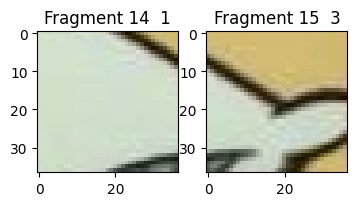

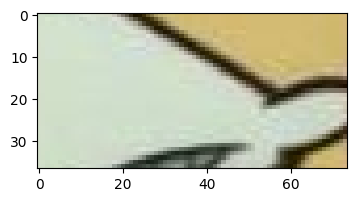

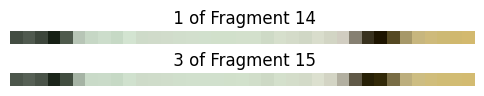

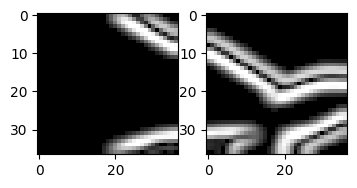

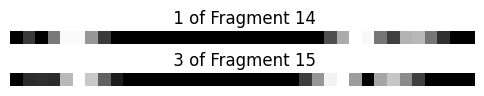

-----------------------------------------------------------------------------------
score: 0.008877638492391853
is correct: True
color score: 0.04569367321355876 grad score: 0.0019709449553636737
grad presence: 11.48876880943017 grad match: 0.022643732899230863
max: 0.17906588324440587 min: 0.005545935538718019
[0.046068   0.01467317 0.01467317 0.00679236 0.00679236 0.00876889
 0.01240109 0.03233808 0.00876889 0.02716942 0.02037707 0.02630668
 0.05462113 0.17906588 0.07784091 0.04722194 0.09772499 0.0611312
 0.01467317 0.01467317 0.01240109 0.01109187 0.02111829 0.01467317
 0.00876889 0.00554594 0.00876889 0.00679236 0.01999615 0.08122477
 0.14536277 0.11653065 0.03921569 0.05261336 0.13859292 0.13385136
 0.10203617]


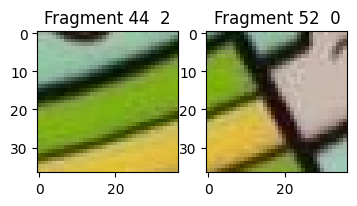

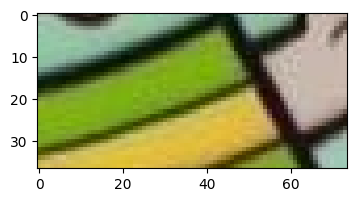

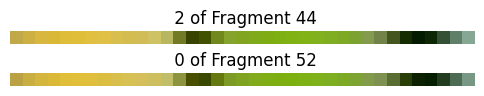

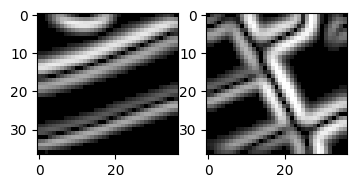

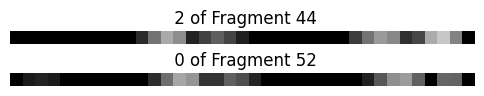

-----------------------------------------------------------------------------------
score: 0.01035670065471905
is correct: False
color score: 0.060790260626888616 grad score: 0.0
grad presence: 5.8696540816296325 grad match: 0.0
max: 0.15409319768147842 min: 0.016169041669088863
[0.04384447 0.08197861 0.04991342 0.05614832 0.06087912 0.06037178
 0.05405509 0.0533391  0.05998846 0.0662037  0.04786885 0.04786885
 0.0562851  0.0562851  0.06371795 0.07047922 0.06859943 0.07533087
 0.07784091 0.07113081 0.06949037 0.0562851  0.06631974 0.05986015
 0.07252252 0.06443795 0.04539544 0.06371795 0.03551131 0.0440195
 0.01616904 0.07069708 0.1540932  0.08281848 0.01797089 0.07080577
 0.036996  ]


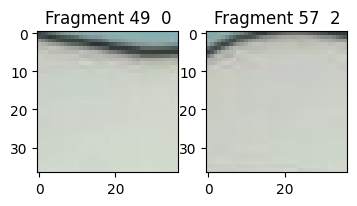

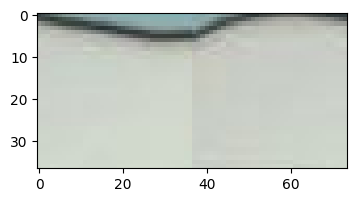

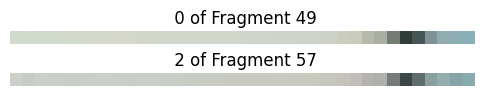

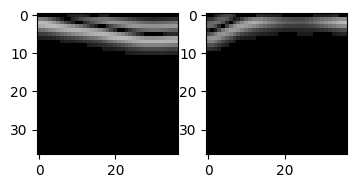

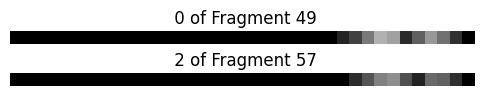

-----------------------------------------------------------------------------------
score: 0.011985398686692314
is correct: True
color score: 0.031278226466284864 grad score: 0.0021833374146390475
grad presence: 15.241993872604251 grad match: 0.03327841767909338
max: 0.23953691065216395 min: 0.0
[0.01358471 0.03396178 0.01240109 0.03862297 0.06371795 0.01663781
 0.02772968 0.00784314 0.00554594 0.         0.         0.
 0.         0.         0.         0.         0.02772968 0.05696407
 0.03418744 0.02286648 0.01467317 0.0418709  0.07209716 0.23953691
 0.19552864 0.08235294 0.01467317 0.02571545 0.04112976 0.02716942
 0.04075414 0.         0.         0.         0.         0.
 0.        ]


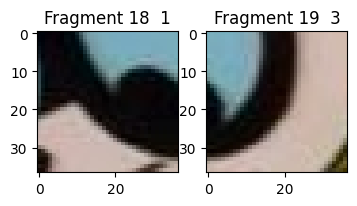

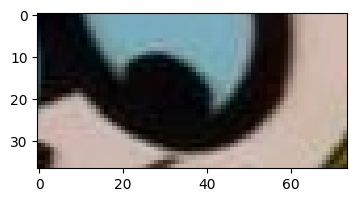

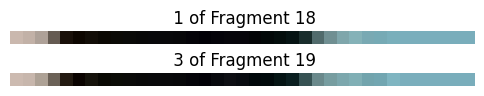

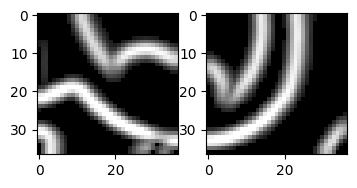

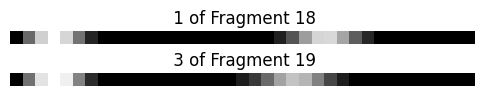

-----------------------------------------------------------------------------------
score: 0.015365802445259
is correct: True
color score: 0.05207744795528615 grad score: 0.002580206986920182
grad presence: 18.298968317983725 grad match: 0.04721512848769965
max: 0.26770271632746684 min: 0.006792356108113244
[0.00784314 0.00679236 0.00784314 0.00784314 0.00784314 0.00784314
 0.01109187 0.01109187 0.01109187 0.02037707 0.02716942 0.03441163
 0.03441163 0.03012214 0.00784314 0.03233808 0.02352941 0.0328102
 0.02630668 0.09387223 0.2338189  0.26770272 0.12567389 0.04094238
 0.04112976 0.17897998 0.13825963 0.04018412 0.06758309 0.04018412
 0.09621839 0.03615508 0.02986578 0.02417417 0.01663781 0.03941128
 0.06746922]


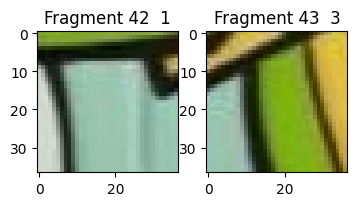

KeyboardInterrupt: 

<Figure size 400x400 with 0 Axes>

In [3]:
def make_next_solving_step(fragments: List[Fragment], show_all_posible_matches):

    sides_comparisons = create_sides_comparisons(fragments)
    sorted_sides_comparisons = sort_sides_comparisons(sides_comparisons)

    if show_all_posible_matches:
        print("-------------------------All Posible Matches-------------")
        display_fragments_characteristics(fragments, sorted_sides_comparisons)

    new_fragments = merge_fragments_two_by_two(fragments, sorted_sides_comparisons)
    print("------------------------New Fragments-------------------------")
    for fr in new_fragments:
        plt.imshow(fr.value)
        plt.show()

    return new_fragments

fragments2 = make_next_solving_step(fragments, 1)


------------------------New Fragments-------------------------


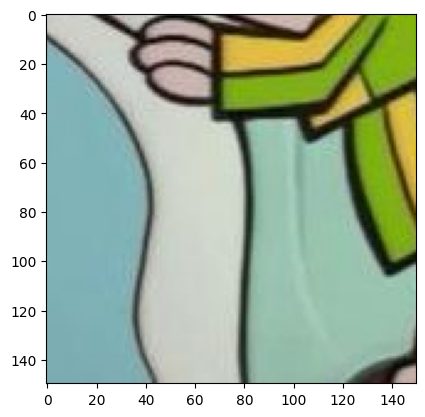

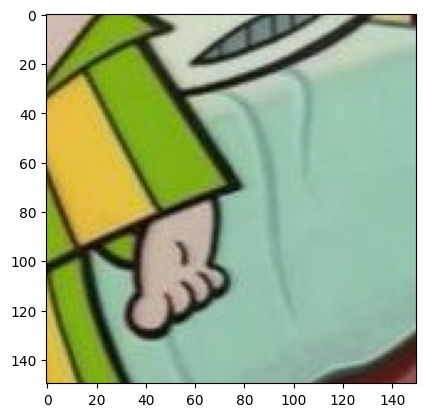

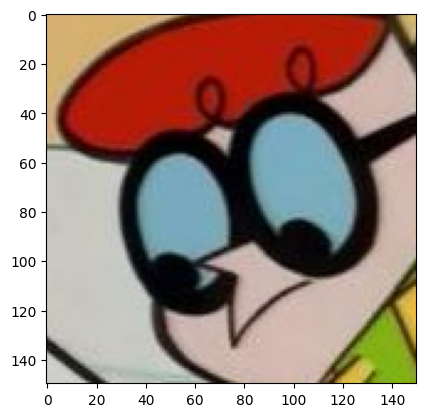

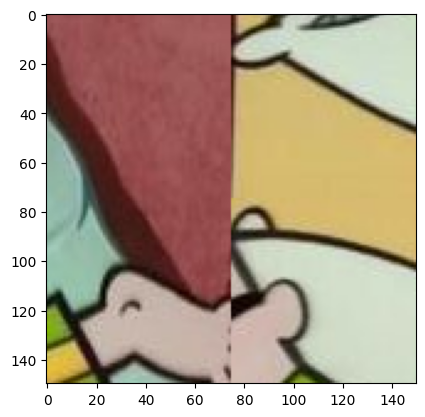

In [ ]:
fragments3 = make_next_solving_step(fragments2, 0)

------------------------New Fragments-------------------------


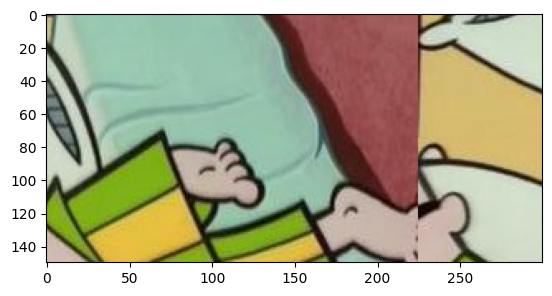

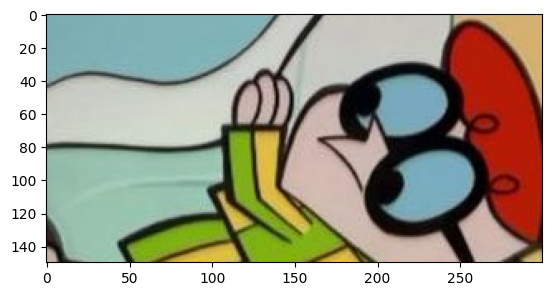

In [ ]:
fragments4 = make_next_solving_step(fragments3, 0)

------------------------New Fragments-------------------------


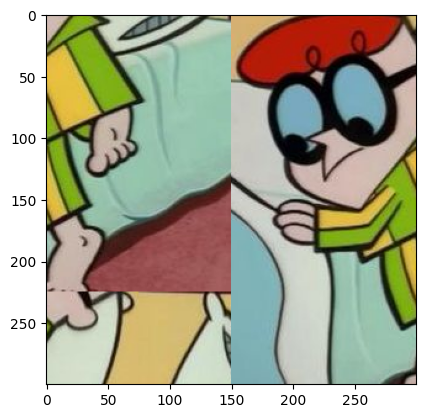

In [ ]:
fragments5 = make_next_solving_step(fragments4, 0)

In [ ]:
fragments6 = make_next_solving_step(fragments5, 0)

------------------------New Fragments-------------------------


In [ ]:
fragments6 = make_next_solving_step(fragments5, 0)

------------------------New Fragments-------------------------


In [ ]:
fragments7 = make_next_solving_step(fragments6, 0)

------------------------New Fragments-------------------------
